<a href="https://colab.research.google.com/github/Ruchit22solanki/Minimum-Wireless-Charger-Placement-with-Individual-Energy-Requirement/blob/main/PIO_random.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import random 
import math
import matplotlib.pyplot as plt 

In [88]:
class Sensor :
  count_sensors=0
  total_sensors=50
  def __init__(self,x,y,req_charging_level,charging_level=0):
    self.x=x
    self.y=y
    self.req_charging=req_charging_level
    self.curr_charging=0

  def __eq__(self,point):
    if self.x==point.x and self.y==point.y:
      return True
    return False 

  def __hash__(self):
    return hash(self.x+self.y)

  def __str__(self):
    return f"x={self.x},y={self.y},,req_charing_level={self.req_charging}"
    
  def dist(self,point):
    return math.sqrt((self.x-point.x)**2+(self.y-point.y)**2)



In [74]:
class Charger :
  charger_energy=1000
  radius=70
  total_chargers=1000
  min_power=(2.5*charger_energy)/((radius+15)**2)
  def __init__(self,x,y):
    self.x=x
    self.y=y
  
  def __eq__(self,point):
    if self.x==point.x and self.y==point.y:
      return True
    return False 

  def __hash__(self):
    return hash(self.x+self.y)
    
  def charging_level(self,point):
    dist=math.sqrt((self.x-point.x)**2+(self.y-point.y)**2)
    p_rx=(2.5*self.charger_energy)/((dist+15)**2)
    p_in=-0.00001*(p_rx**2)+0.57*p_rx+10
    return p_in//self.min_power 

  def __str__(self):
    return f"x={self.x},y={self.y}"

  def check_dist(self,point):
    return (math.sqrt((self.x-point.x)**2+(self.y-point.y)**2))<=self.radius

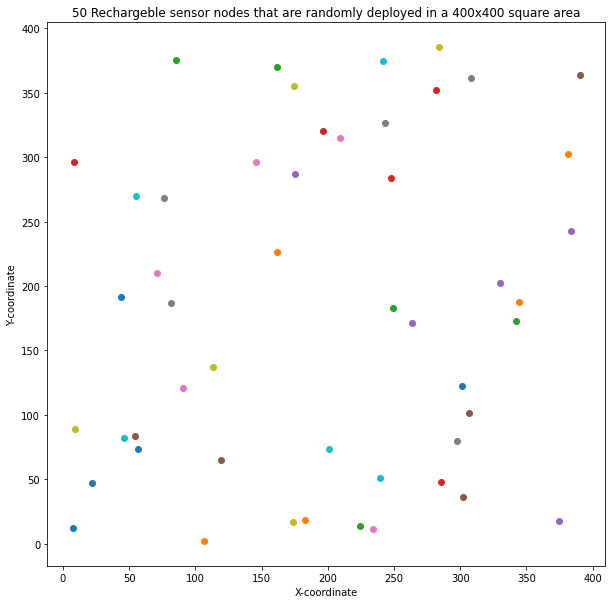

In [75]:
area=400
sensors=set()
while len(sensors)<Sensor.total_sensors:
  x_coordinate=random.uniform(0,area)
  y_coordinate=random.uniform(0,area)
  req_charging=round(random.uniform(10,20))
  sensors.add(Sensor(x_coordinate,y_coordinate,req_charging))

plt.figure(figsize=(10, 10))
for items in sensors:
  plt.scatter(items.x, items.y) 
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate") 
plt.title(f"{Sensor.total_sensors} Rechargeble sensor nodes that are randomly deployed in a {area}x{area} square area")
plt.show() 


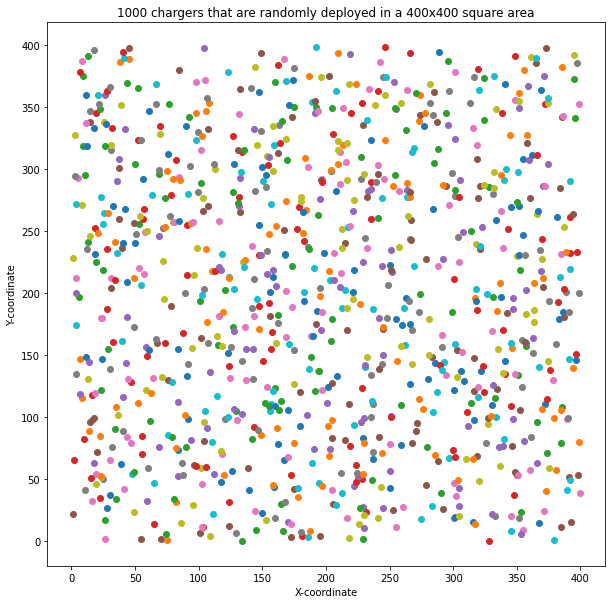

In [76]:
chargers=set()
while len(chargers)<Charger.total_chargers:
    x=random.uniform(0,area)
    y=random.uniform(0,area)
    charger=Charger(x,y)
    chargers.add(charger)

plt.figure(figsize=(10, 10))
for items in chargers:
  plt.scatter(items.x, items.y) 
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate") 
plt.title(f"{Charger.total_chargers} chargers that are randomly deployed in a {area}x{area} square area")
plt.show()  

In [77]:
selected_chargers=set()
while Sensor.count_sensors<Sensor.total_sensors:
  flag=1
  while flag:
    charger=random.choice(tuple(chargers))
    if charger not in selected_chargers:
        flag=0
        selected_chargers.add(charger)
        for item in sensors:
          if charger.check_dist(item) and item.curr_charging<item.req_charging:
            L=charger.charging_level(item)
           
            if item.curr_charging+L>=item.req_charging:
               Sensor.count_sensors+=1

            item.curr_charging+=L
  chargers.discard(charger)
  if len(chargers)==0 and Sensor.total_sensors>Sensor.count_sensors:
    print(f"not enough chargers:{Sensor.total_sensors-Sensor.count_sensors} sensors still remained to fulfill their required charging level")
    break


number of chargers : 66


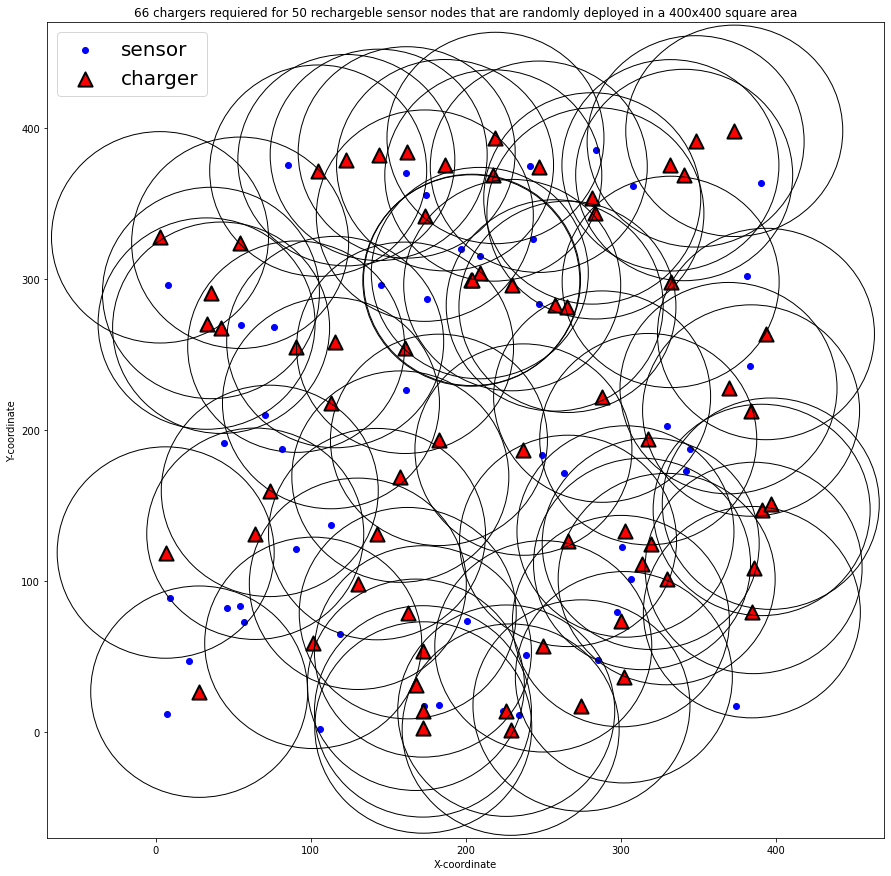

In [87]:
print("number of chargers :",len(selected_chargers))
fig,ax = plt.subplots(figsize=(15, 15))
for items in sensors:
  plt1=plt.scatter(items.x, items.y,c='b') 


for item in selected_chargers:
  num=random.randint(0,6)
  circle= plt.Circle((item.x, item.y),70, fill=False,color='black')
  ax.add_patch(circle)
  plt2=plt.scatter(item.x,item.y, c ='r',linewidths = 2,edgecolor="black" ,marker ="^",s = 200)   

plt.legend([plt1,plt2],["sensor","charger"],prop={'size':20})
plt.axis([-(Charger.radius), area+Charger.radius, -(charger.radius),area+Charger.radius])
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate") 
plt.title(f"{len(selected_chargers)} chargers requiered for {Sensor.total_sensors} rechargeble sensor nodes that are randomly deployed in a {area}x{area} square area")
plt.show()
